In [6]:
from google.colab import files
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Saving 250px-Shah_Rukh_Khan_2001.jpg to 250px-Shah_Rukh_Khan_2001.jpg
Found 1 faces
Found 2 eyes in this face


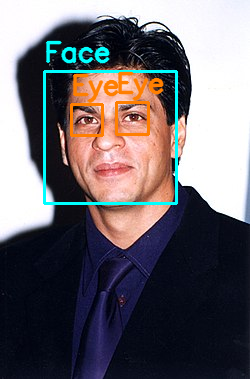

In [9]:
def upload_and_detect():
    # Upload file
    uploaded = files.upload()

    # Get the uploaded filename
    image_filename = list(uploaded.keys())[0]

    # Read the uploaded image
    img = cv2.imread(image_filename)

    if img is None:
        print("Error: Could not load the uploaded image")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    print(f"Found {len(faces)} faces")

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 0), 2)
        cv2.putText(img, "Face", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 0), 2, cv2.LINE_AA)

        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        print(f"Found {len(eyes)} eyes in this face")

        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 127, 255), 2)
            cv2.putText(roi_color, "Eye", (ex, ey - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 127, 255), 2, cv2.LINE_AA)

    # Display result
    cv2_imshow(img)

# Run this function to upload and detect
upload_and_detect()